svm classification

In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
train_dir = r"C:\Users\hegde\Downloads\archive\casting_512x512\casting_512x512" 

In [75]:
data_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [77]:
train_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32), 
    batch_size=64,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 1041 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [79]:
def load_and_flatten_images(data):
    images = []
    labels = []
    
    for X_batch, y_batch in data:
        flattened_images = X_batch.reshape(X_batch.shape[0], -1) 
        images.append(flattened_images)
        labels.append(y_batch)        
        if len(images) >= data.samples // data.batch_size:
            break
    
    return np.vstack(images), np.hstack(labels)

In [81]:
X_train, y_train = load_and_flatten_images(train_data)
X_val, y_val = load_and_flatten_images(val_data)

In [83]:
pca = PCA(n_components=100) 
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [85]:
svm_model = SVC(kernel='linear', C=1.0)  
svm_model.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [87]:
y_pred = svm_model.predict(X_val_pca)

In [89]:
print("SVM Classification Report:\n", classification_report(y_val, y_pred, target_names=['non-defective', 'defective']))

SVM Classification Report:
                precision    recall  f1-score   support

non-defective       0.84      0.85      0.85       153
    defective       0.77      0.77      0.77       103

     accuracy                           0.82       256
    macro avg       0.81      0.81      0.81       256
 weighted avg       0.82      0.82      0.82       256



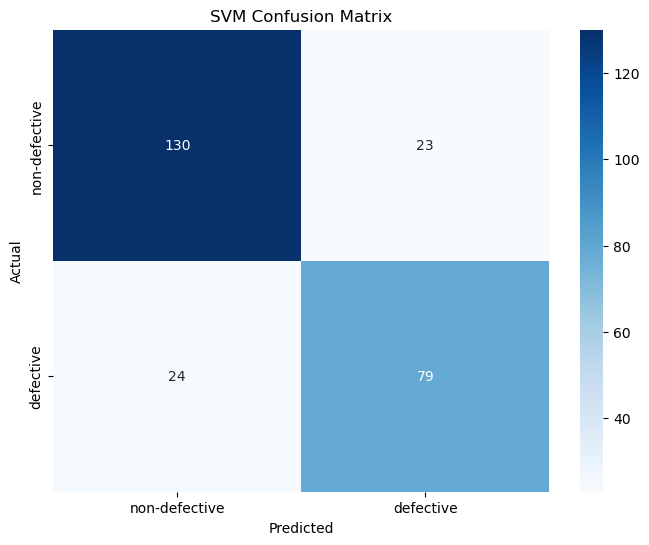

In [91]:
cm_svm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['non-defective', 'defective'], yticklabels=['non-defective', 'defective'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()

For binary image classification, there are various methods available, and the choice of method depends on the specific requirements of the task. For this purpose, I have chosen the SVM (Support Vector Machine) classification model. SVM often requires dimensionality reduction techniques, such as PCA (Principal Component Analysis), to improve performance.

In this case, I used a linear kernel for the SVM, though there are also non-linear kernels available, which distinguish SVM from models like logistic regression. The target image size for this experiment is set to 32x32, with a batch size of 64, which is acceptable. By applying PCA, we are performing dimensionality reduction, focusing on reducing the number of components to just 100. This may seem relatively low, especially considering that the dataset consists of around 6,000 images. As the dataset size increases, the complexity also increases, which can affect the results.

Additionally, I split the dataset into an 80:20 ratio for training and testing purposes

Logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_reg = LogisticRegression(max_iter=200, solver='liblinear', tol=1e-4) 
log_reg.fit(X_train_pca, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [98]:
y_pred = log_reg.predict(X_val_pca)

In [100]:
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred, target_names=['non-defective', 'defective']))

Logistic Regression Classification Report:
                precision    recall  f1-score   support

non-defective       0.80      0.86      0.83       153
    defective       0.77      0.67      0.72       103

     accuracy                           0.79       256
    macro avg       0.78      0.77      0.77       256
 weighted avg       0.78      0.79      0.78       256



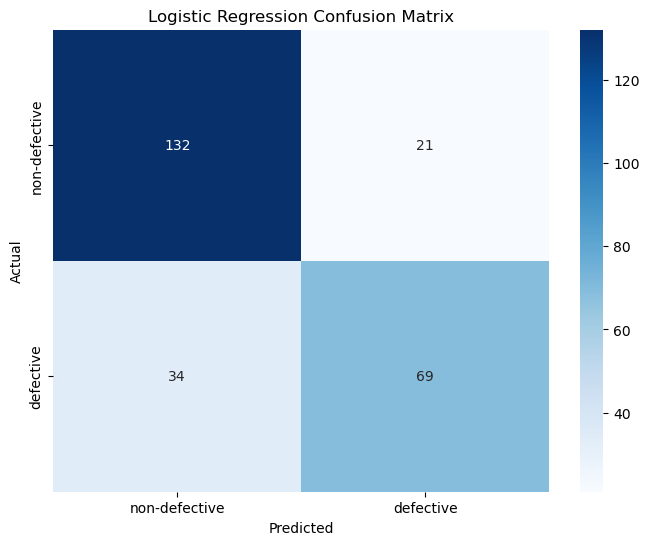

In [102]:
cm_log_reg = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['non-defective', 'defective'], yticklabels=['non-defective', 'defective'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Here I am using the logistic regression for the binary classification. It also requires the PCA to process .

I used same 32*32 image size and 64 batches. All are the same requirement as SVM requires. But it comparative less flexible.

In [105]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  
svm_model.fit(X_train_pca, y_train)

SVC()

In [107]:
y_pred = svm_model.predict(X_val_pca)

In [109]:
print("SVM Classification Report:\n", classification_report(y_val, y_pred, target_names=['non-defective', 'defective']))

SVM Classification Report:
                precision    recall  f1-score   support

non-defective       0.89      0.86      0.87       153
    defective       0.80      0.84      0.82       103

     accuracy                           0.85       256
    macro avg       0.84      0.85      0.85       256
 weighted avg       0.85      0.85      0.85       256



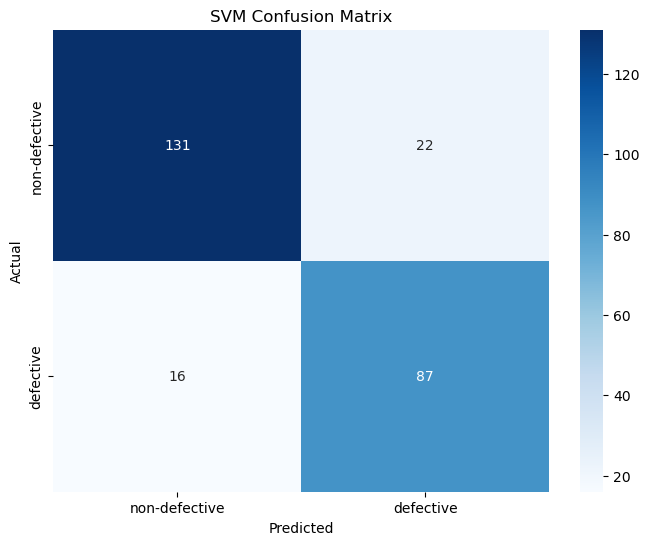

In [111]:
cm_svm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['non-defective', 'defective'], yticklabels=['non-defective', 'defective'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()

Here non-linear kernel is used for the boundary, we can see here that it performance is little bit high comparitively to other two models. this is the advantage in SVM that I am told in the linear-SVM model.